<html>
<div>
  <img src="https://www.engineersgarage.com/wp-content/uploads/2021/11/TCH36-01-scaled.jpg" width=360px width=auto style="vertical-align: middle;">
  <span style="font-family: Georgia; font-size:30px; color: white;"> <br/> University of Tehran <br/> AI_CA0 <br/> Spring 02 </span>
</div>
<span style="font-family: Georgia; font-size:15pt; color: white; vertical-align: middle;"> low_mist - std id: 810100186 </span>
</html>

in this notebook we are to learn about data manipulation and predict salary of the test file

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

TRAIN_FILE_ADDRESS = "assets/train.csv"
TESR_FILE_ADDRESS = "assets/test.csv"

1-


In [104]:
df = pd.read_csv(TRAIN_FILE_ADDRESS)
df_backup = pd.read_csv(TRAIN_FILE_ADDRESS)

``info``:<br/>
this method gives information about the database like column names and number of non-null values in each column <br/>
or type of the column <br/>

In [105]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29825 entries, 0 to 29824
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29825 non-null  int64 
 1   workclass       28154 non-null  object
 2   fnlwgt          29825 non-null  int64 
 3   education       29825 non-null  object
 4   education-num   29825 non-null  int64 
 5   marital-status  29825 non-null  object
 6   occupation      28149 non-null  object
 7   relationship    29825 non-null  object
 8   race            29825 non-null  object
 9   sex             29825 non-null  object
 10  capital-gain    29825 non-null  int64 
 11  capital-loss    29825 non-null  int64 
 12  hours-per-week  29825 non-null  int64 
 13  native-country  29288 non-null  object
 14  salary          29825 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.4+ MB
None


``head and tail``:<br/>
these methods respectively show us the first and last 5 rows<br/>
they are generally used to peek at the data

In [106]:
print(df.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country salary  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [107]:
print(df.tail())

       age  workclass  fnlwgt     education  education-num  \
29820   48  Local-gov  127921     Bachelors             13   
29821   32    Private   42617  Some-college             10   
29822   47  Local-gov  191389       HS-grad              9   
29823   38    Private  187983   Prof-school             15   
29824   18    Private  215110       HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
29820  Married-civ-spouse     Prof-specialty        Husband  White    Male   
29821            Divorced     Prof-specialty  Not-in-family  White  Female   
29822            Divorced       Adm-clerical      Unmarried  White  Female   
29823  Married-civ-spouse              Sales           Wife  White  Female   
29824       Never-married  Handlers-cleaners      Own-child  Black    Male   

       capital-gain  capital-loss  hours-per-week native-country salary  
29820             0             0              40  United-States  <=50K  
29821     

``describe``:<br/>
this method gives general information about each numerical column, namely:
<ol>
<li> count: number of not Nan values</li>
<li> mean: mean of each column</li>
<li> std: standard deviation of each column</li>
<li> 25%, 50%, 75%: x% percentile of the column</li>
<li> max: maximum value of each column</li>
</ol>

In [108]:
print(df.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  29825.000000  2.982500e+04   29825.000000  29825.000000  29825.000000   
mean      38.581425  1.897389e+05      10.079229   1094.586052     86.476513   
std       13.652005  1.053738e+05       2.571678   7485.908646    401.195078   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178490e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.785170e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.368790e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    29825.000000  
mean        40.434334  
std         12.308174  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


2 -<br/>
first I use select_dtypes to choose the columns which should be label encoded and then I use cat.codes 
note: i use dropna() so it wont replace the not existing values with indexes

In [109]:
for column in df.select_dtypes("object").columns:
    df[column] = df[column].astype("category").dropna().cat.codes

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29825 entries, 0 to 29824
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             29825 non-null  int64  
 1   workclass       28154 non-null  float64
 2   fnlwgt          29825 non-null  int64  
 3   education       29825 non-null  int8   
 4   education-num   29825 non-null  int64  
 5   marital-status  29825 non-null  int8   
 6   occupation      28149 non-null  float64
 7   relationship    29825 non-null  int8   
 8   race            29825 non-null  int8   
 9   sex             29825 non-null  int8   
 10  capital-gain    29825 non-null  int64  
 11  capital-loss    29825 non-null  int64  
 12  hours-per-week  29825 non-null  int64  
 13  native-country  29288 non-null  float64
 14  salary          29825 non-null  int8   
dtypes: float64(3), int64(6), int8(6)
memory usage: 2.2 MB
None


now we can see for example that for sex column each Male is replaces with 1 and Female is replaced with 0

In [110]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,6.0,77516,9,13,4,0.0,1,4,1,2174,0,40,38.0,0
1,50,5.0,83311,9,13,2,3.0,0,4,1,0,0,13,38.0,0
2,38,3.0,215646,11,9,0,5.0,1,4,1,0,0,40,38.0,0
3,53,3.0,234721,1,7,2,5.0,0,2,1,0,0,40,38.0,0
4,28,3.0,338409,9,13,2,9.0,5,2,0,0,0,40,4.0,0


3 - <br/>
now we should see percentage of NaN values in each column

In [111]:
df.isnull().sum() * 100 / len(df)

age               0.000000
workclass         5.602682
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.619447
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.800503
salary            0.000000
dtype: float64

due to high percentage of Nan in workclass and occupation column I will delete these two and replace NaN values in native-country with the median

In [112]:
df = df.drop("workclass", axis = 1).drop("occupation", axis = 1)
df["native-country"].fillna(df["native-country"].mode(), inplace = True)

now we can see that there is no Nan

In [113]:
df.isnull().sum() * 100 / len(df)

age               0.000000
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.800503
salary            0.000000
dtype: float64

an alternative way to handle Nan values can be to replace values with mean which has it's own advantages and disadvantages:
<dl>
  <dt style="color: green;">advantages</dt>
  <dd>- it's convenient and easy</dd>
  <dd>- it doesn't deviate datasets</dd>
  <dt style="color: red;">disadvantages</dt>
  <dd>- causes the std to be underestimated, may also obscure important features of the population from which the data were sampled</dd>
  <dd>- the new data doesn't make sense, for instance the mean of some integers may be a float number but we haven't assigned any meaning to float numbers</dd>
  <dd>- it may corrupt the correlation between features</dd>
</dl>

4 - <br/>
first we have to find columns which have too many unique values so it wont help our prediction<br/>
in this project I consider the number of unique values to be at least half to be considered as column with unique values<br/>

In [114]:
df.columns[df.nunique() >= len(df) / 2]

Index(['fnlwgt'], dtype='object')

so we have to drop fnlwgt column

In [115]:
df = df.drop("fnlwgt", axis = 1)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29825 entries, 0 to 29824
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             29825 non-null  int64  
 1   education       29825 non-null  int8   
 2   education-num   29825 non-null  int64  
 3   marital-status  29825 non-null  int8   
 4   relationship    29825 non-null  int8   
 5   race            29825 non-null  int8   
 6   sex             29825 non-null  int8   
 7   capital-gain    29825 non-null  int64  
 8   capital-loss    29825 non-null  int64  
 9   hours-per-week  29825 non-null  int64  
 10  native-country  29288 non-null  float64
 11  salary          29825 non-null  int8   
dtypes: float64(1), int64(5), int8(6)
memory usage: 1.5 MB


In [117]:
df.nunique()

age                72
education          16
education-num      16
marital-status      7
relationship        6
race                5
sex                 2
capital-gain      118
capital-loss       91
hours-per-week     94
native-country     41
salary              2
dtype: int64

5 - <br/>
number of women

In [118]:
len(df_backup.loc[df_backup["sex"] == "Female"])

9869

number of men

In [119]:
len(df_backup.loc[df_backup["sex"] == "Male"])

19956

number of married men

In [120]:
married_options = ["Married-AF-spouse", "Married-civ-spouse", "Married-spouse-absent"]
married = list(map(lambda x: x in married_options, df_backup["marital-status"]))
men = (df_backup["sex"] == "Male")
len(df_backup.loc[married & men])

12373

6 - <br/>
number of black people above 30 who works privately 

In [121]:
age = (df_backup["age"] > 30)
workclass = (df_backup["workclass"] == "Private")
race = (df_backup["race"] == "Black")
len(df_backup.loc[race & age & workclass])

1274

7 - <br/>
mean hours per weak for people who have bachelor degrees 

In [122]:
def mean_vectorized():
    return df_backup.loc[df_backup["education"] == "Bachelors"]["hours-per-week"].mean()

print(mean_vectorized())

42.546669366268475


8 - <br/>
now we are gonna do part 7 once again now without vectorization 

In [123]:
def mean_not_vectorized():
    sum = 0
    count = 0
    for i, person in df_backup.iterrows():
        if person["education"] == "Bachelors":
            sum += person["hours-per-week"]
            count += 1
    return sum / count

print(mean_not_vectorized())

42.546669366268475


and now compare the running time of both ways

In [124]:
import timeit

def calc_exec_time(setup, code):
    return min(timeit.repeat(setup = setup, stmt = code, number = 100, repeat = 2)) / 100

print("vectorized: ", calc_exec_time('''from __main__ import mean_vectorized''', '''mean_vectorized()'''))
print("not-vectorized: ", calc_exec_time('''from __main__ import mean_not_vectorized''', '''mean_not_vectorized()'''))

vectorized:  0.0013782099999662023
not-vectorized:  0.449781168000045


obviously as expected non-vectorization is slower

9 - <br/>
draw hist diagram of each distribution

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'education-num'}>],
       [<Axes: title={'center': 'marital-status'}>,
        <Axes: title={'center': 'relationship'}>,
        <Axes: title={'center': 'race'}>],
       [<Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>],
       [<Axes: title={'center': 'hours-per-week'}>,
        <Axes: title={'center': 'native-country'}>,
        <Axes: title={'center': 'salary'}>]], dtype=object)

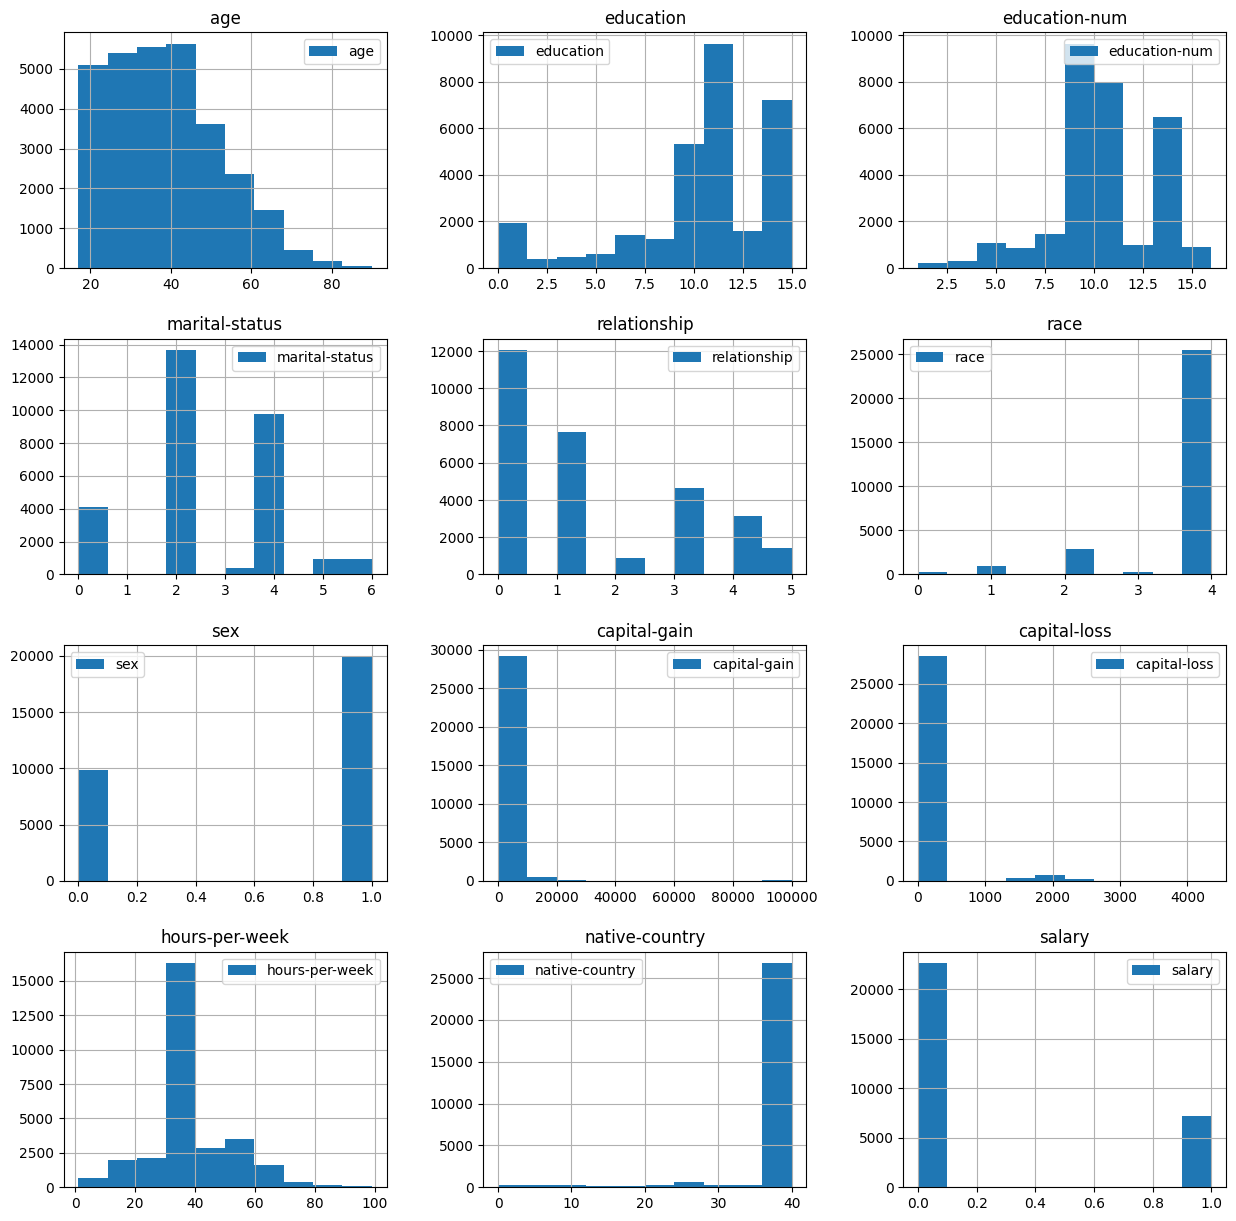

In [125]:
df.hist(figsize = (15, 15), legend = True)

10 - <br/>
in order to improve the model we normalize our datas

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'education-num'}>],
       [<Axes: title={'center': 'marital-status'}>,
        <Axes: title={'center': 'relationship'}>,
        <Axes: title={'center': 'race'}>],
       [<Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>],
       [<Axes: title={'center': 'hours-per-week'}>,
        <Axes: title={'center': 'native-country'}>,
        <Axes: title={'center': 'salary'}>]], dtype=object)

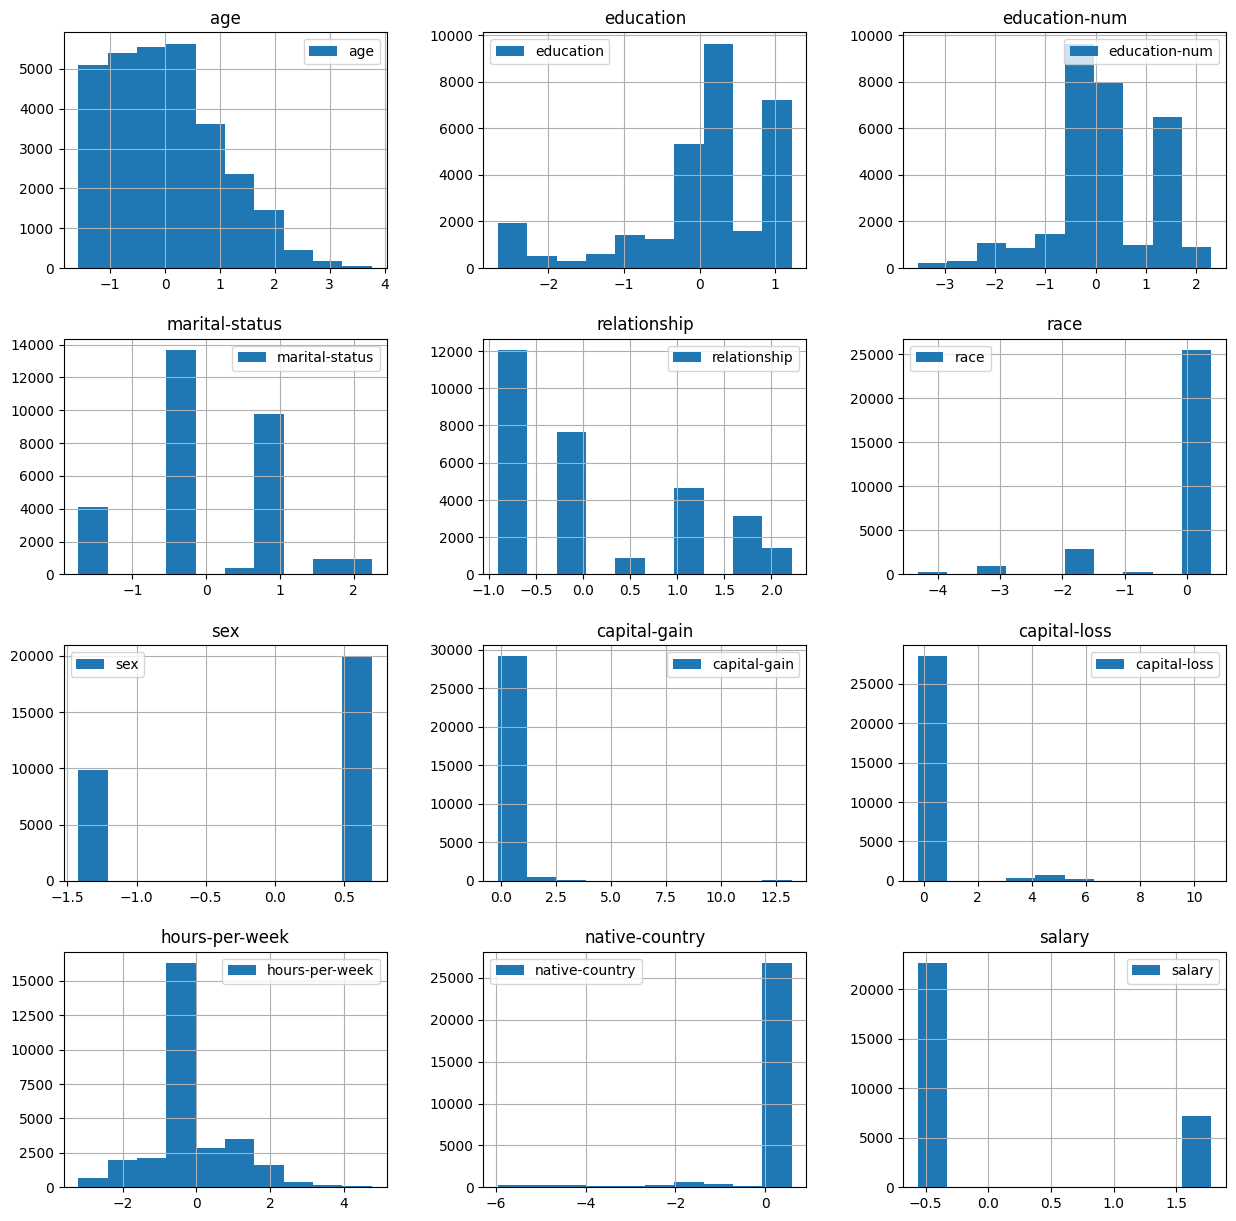

In [126]:
normalized_df = (df - df.mean()) / df.std()
normalized_df.hist(figsize = (15, 15), legend = True)

In [131]:
print(normalized_df.describe().loc[["std", "mean"]])

               age     education  education-num  marital-status  relationship  \
std   1.000000e+00  1.000000e+00   1.000000e+00    1.000000e+00  1.000000e+00   
mean -1.639073e-16  2.491962e-16  -1.243599e-16   -1.150686e-16  6.837410e-17   

              race           sex  capital-gain  capital-loss  hours-per-week  \
std   1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00    1.000000e+00   
mean  2.291843e-16 -4.550332e-17 -1.643837e-17 -4.740922e-17    2.699229e-16   

      native-country        salary  
std     1.000000e+00  1.000000e+00  
mean   -4.308672e-16  8.886251e-17  


each column has std of 1 and almost mean of 0, so it has successfully been normalized

11 - <br/>

In [ ]:
higher_than_50_salary = (df_backup["salary"] == ">50")